# ENPH 213 - Week 2 Lab 
#### Parts 1-5

In this lab, we will be working with Numerical Integration while continuing to develop your Python skills.

There is an accompanying file (ENPH213_Lab2_Hysteresis-Data.csv) that should be downloaded to the same folder as this notebook.  When you are finished, please rename this notebook to LastName_ENPH213_Lab2, where LastName is your last name.  Submit that file to onQ.

## Part 1
Load the data from "ENPH213_Lab2_Hysteresis-Data.csv", and plot the curve of v$_y$ as a function of v$_x$.  Before you being, open the file in a text editor so that you know the format of the data and can manipulate it properly.

In [1]:
#Importing modules
import math as m
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#loading "ENPH213_Lab2_Hysteresis-Data.csv" data to variable testData, skip the 1st column since it is a description
#using delimiter "," due to the csv file format
testData = np.loadtxt("ENPH213_Lab2_Hysteresis-Data.csv", delimiter = ",", skiprows = 1) 

#Set the second column to xData, third column to yData
xData = testData[:,1]
yData = testData[:,2]

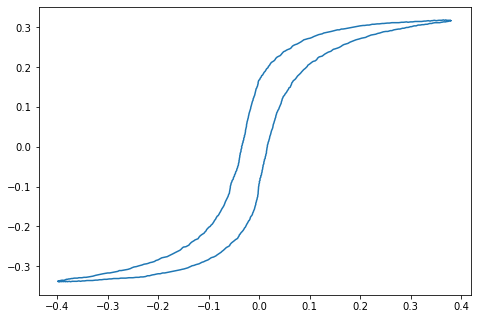

In [3]:
#Now we have the variables for x and y we can plot the data

fig = plt.figure()  # Create a figure object
ax = fig.add_axes([0,0,1,1])  #Adds axis, box at 0,0 with 100% length and width
ax.plot(xData,yData)  # Plots the data y vs x

## Part 2
In the Part 3, you will be asked to find the area between the two curves.  In a few sentences, first indicate what algorithm you would like to use and why.  Then, describe how you will get the area considering how the data is presented.

#### I am going to use Simpson's Rule due to its' accuracy and similar complexity to other less accurate methods. 
#### First we need to seperate the data into the upper and lower curve in order to integrate the area between. 

## Part 3
Create a function myIntFunc(x,y) that calculates the area of a hysteresis curve, such as the one you plotted above, where x and y are the input vectors of the x- and y-axes, respectively.  Of note, comment on what form the vectors should take to have the function operate properly.  Have the function output the area. (Hint: my value was in the range 0.04 and 0.05)

In [4]:
#Since the data is increasing until line 335 we can seperate the data as such
xData1 = xData[0:334]       
xData2 = xData[-1:333:-1]
                               
yData1 = yData[0:334]
yData2 = yData[-1:333:-1]

In [5]:
# Now can create the function using Simpson's Rule
        
def myIntFunc(x,y):   
    intg = 0 # variable to store the total area
    
    #loop from 1 until the length of the array -2 since the first row is titles
    for i in range(0,len(x)-2,2):
        # Regions twice as big, so need to evaluate at every other index
        h = 0.5*abs(x[i+2]-x[i]) # Determine the width of the block
        # need absolute val due to negative x vals
        intg = intg + (y[i] + 4*y[i+1] + y[i+2])*h/3
          
    return intg

#The Area between the curves is equal to the difference in absolute value of the areas below each curve
area = abs(myIntFunc(xData1, yData1) - myIntFunc(xData2, yData2))

#Now ouput the value with a print statement
print("The area between the curves is about", area)

The area between the curves is about 0.04657863921666673


## Part 4

One interesting function that appears often and exists as a integral function is the Guass Error Function or more commonly simply the Error Function.  It is written as erf(x) and has the form:

### $ erf(x) = \frac{2}{\sqrt\pi} \int_0^x e^{-z^2} dz$

Write a function myErf(x, N) using Simpson's 1/3 Rule (itself a separate function) to evaluate the Error Function for an input x and a number of points to evaluate N.  

Then evaluate myErf for x = 0.213, but determine how many points N are needed to be within 0.00001 of the accepted value (Google calculated this for me: 0.2367589703).

In [16]:
def func(x):
    return np.exp(-x**2)


def simpsons(x,N):
    h = abs((x-0)/(N)) #initalize h and sum
    sum = 0
    
    for i in range(0,N-1,2):
        sum = sum + (func(h*i-h)) +4*func(h*i) + func(h*i+h)    
    return sum*(h/3)
    

def myErf(x,N):
    return 2/m.sqrt(np.pi) * simpsons(x,N)

#Given Values 
googleVal = 0.2367589703 # given calculated val-+
 
N = 1 #need to start at 1 since div zero error
x = 0.213 
limit = 0.00001


while (abs(googleVal - myErf(x,N)) >= limit):
    #print(N) #Test print
    N += 1000
    
N = N-1
print("\nYou need ",N,"points to get within 0.00001 of Google's value", googleVal)
print("\nThe difference after",N,"points is ", abs(googleVal - myErf(x,N)))


You need  22000 points to get within 0.00001 of Google's value 0.2367589703

The difference after 22000 points is  4.845510448436841e-07


## Part 5

Using Simpson's Rule, calculate the following double integral:

# $ \Omega  = \int_{y=0}^{\pi/2} \int_{x=0}^{\pi} \sqrt{x+y} \sin(x) \cos(y) dx dy $

Using N = 101 points in each direction, my calculation for $\Omega$ was between 2.0 and 3.0.  Aim to do this question using a matrix of weighting coefficients.  Full marks will be given if no loops are used.

In [7]:
#Given Values 
N = 101 #number of points
xa = 0
xb = np.pi

ya = 0
yb = np.pi/2

intg = 0 # initally set to zero

hx = abs((xb-xa)/(N-1))# N points gives N-1 regions

hy = abs((yb-ya)/(N-1)) #same as hx but with y

#funtion for the equation given
def func(x,y):
    return np.sqrt(x+y)*np.sin(x)*np.cos(y)
 
#create N, x and y points within limits
xpoints = np.linspace(xa,xb,N)
ypoints = np.linspace(ya,yb,N)

Fpoints = func(xpoints,ypoints) # call the function

newWeights = np.ones(N) # weight vector with ones
newWeights[1:N:2] = 4 # adding 4's 1, 3, 5
newWeights[2:-2:2]=2 # Adding 2's in the array 
newWeights = np.outer(newWeights,newWeights) # expands the dimension of the array (2D)
print("The Weighted Array\n",newWeights) #displays array



intg = (hx*hy)/9*np.sum(Fpoints*newWeights) #multiply points by weight and take dot prod times the widths

print("\nThe double integral is",intg) # final statement

The Weighted Array
 [[ 1.  4.  2. ...  2.  4.  1.]
 [ 4. 16.  8. ...  8. 16.  4.]
 [ 2.  8.  4. ...  4.  8.  2.]
 ...
 [ 2.  8.  4. ...  4.  8.  2.]
 [ 4. 16.  8. ...  8. 16.  4.]
 [ 1.  4.  2. ...  2.  4.  1.]]

The double integral is 2.8700438107223696


## Part 6: See separate notebook

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

I wrote all the code myself. However Conner Legg, Ekin Yelken, Morgan McPhee and I discussed the problems and exchanged ideas.